## Simple Linear Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [156]:
from sklearn.datasets import load_boston
boston_data = load_boston()

In [157]:
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [158]:
X = boston_data.data
X.shape

(506, 13)

In [159]:
y = boston_data.target
y.shape

(506,)

In [160]:
cols = boston_data.feature_names
len(cols)

13

In [161]:
boston_data.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [162]:
boston_df = pd.concat([pd.DataFrame(X, columns=cols),
                       pd.DataFrame(y, columns=['Price'])],
                     axis=1)

In [163]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Perform Regression on Boston Hosuing Prices Prediction Data

In [11]:
sal_data = pd.read_csv('Salary_Data.csv')
pos_sal_data = pd.read_csv('Position_Salaries.csv')
startup_data = pd.read_csv('Startups_Stat.csv')

In [12]:
sal_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [13]:
pos_sal_data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [14]:
startup_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,NaN,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,NaN,166187.94


In [15]:
sal_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [16]:
X = sal_data.iloc[:, :-1].values
y = sal_data.iloc[:, 1].values

In [17]:
X.shape

(30, 1)

In [18]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.4, 
                                                    random_state = 100)

In [19]:
X_train.shape

(18, 1)

In [20]:
y_test.shape

(12,)

In [21]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)

In [22]:
meanX = sc_X.mean_
varX = sc_X.var_

In [23]:
meanX

array([4.78333333])

In [24]:
varX

array([7.1525])

In [25]:
X_train

array([[-0.96594303],
       [ 2.13753845],
       [-1.37724781],
       [-1.30246512],
       [ 0.41753667],
       [-0.10594214],
       [ 0.45492801],
       [ 0.86623278],
       [-1.22768244],
       [ 0.75405876],
       [-0.3302902 ],
       [ 0.11840592],
       [ 0.04362323],
       [ 1.27753756],
       [-0.5920296 ],
       [-1.04072572],
       [ 1.46449428],
       [-0.5920296 ]])

In [26]:
X_test = sc_X.transform(X_test)
X_test

array([[-0.40507288],
       [ 1.76362502],
       [ 2.06275577],
       [-0.25550751],
       [-0.70420363],
       [-0.29289886],
       [ 1.80101637],
       [ 1.57666831],
       [-0.66681229],
       [ 0.19318861],
       [ 1.16536353],
       [-0.29289886]])

In [27]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(n_jobs=-1)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [28]:
b1 = regressor.coef_
b0 = regressor.intercept_

In [29]:
b1

array([25872.28836475])

In [30]:
b0

71906.11111111111

In [31]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([ 61425.94862368, 117535.1262487 , 125274.3231625 ,  65295.54708058,
        53686.75170988,  64328.14746635, 118502.52586292, 112698.12817758,
        54654.15132411,  76904.34245127, 102056.73242111,  64328.14746635])

In [32]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
print('MSE: ',mse)
rmse = mse**0.5
print('RMSE: ',rmse)

MSE:  32003523.628292203
RMSE:  5657.165688601687


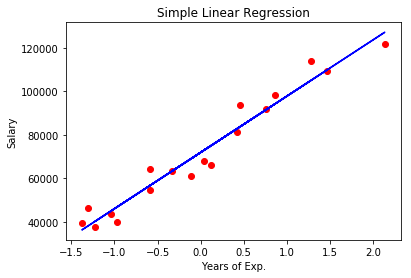

In [33]:
# Visualising the Linear Regression Train results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Simple Linear Regression')
plt.xlabel('Years of Exp.')
plt.ylabel('Salary')
plt.show()

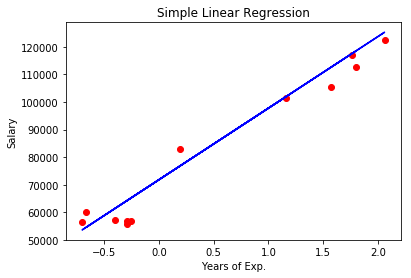

In [34]:
# Visualising the Linear Regression Test results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.title('Simple Linear Regression')
plt.xlabel('Years of Exp.')
plt.ylabel('Salary')
plt.show()

In [35]:
sal_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [39]:
#Predicting future value with model
salary_future = regressor.predict([[6.5]])
salary_future

array([240075.98548197])

In [43]:
sc_X.transform([[6.5]])

array([[0.64188473]])

In [44]:
salary_future = regressor.predict(sc_X.transform([[6.5]]))
salary_future

array([88513.13782197])

In [45]:
salary_future = b0 + b1*(sc_X.transform([[6.5]]))
salary_future

array([[88513.13782197]])

In [46]:
sc_X.transform([[6.5]])

array([[0.64188473]])

In [47]:
sc_X.inverse_transform([0.64188473])

array([6.50000001])

## Multi Linear Regression

In [48]:
startup_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,NaN,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,NaN,166187.94


In [49]:
startup_data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [50]:
startup_data = startup_data.drop(columns='State', axis=1)

In [51]:
startup_data.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [52]:
X = startup_data.iloc[:, :-1].values
y = startup_data.iloc[:, -1].values

In [53]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.4, 
                                                    random_state = 100)

In [54]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
meanX = sc_X.mean_
varX = sc_X.var_


X_test = sc_X.transform(X_test)

In [55]:
meanX

array([ 77331.523     , 123648.11933333, 217158.86933333])

In [56]:
# Fitting Multi Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
b1,b2,b3 = regressor.coef_
b0 = regressor.intercept_

In [58]:
b0

114490.10566666668

In [59]:
b1

37132.62705740123

In [60]:
b2

188.65383442989537

In [61]:
b3

3035.554216919229

In [62]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([160450.33494281,  73389.31538564,  85630.29409635, 103086.5051201 ,
        58373.09838912,  45550.59385202, 163496.77149003,  95998.52564146,
       115487.29897893,  67673.69703604, 194421.38603503, 134581.8576532 ,
       128369.57847554,  45394.08523426,  65497.45348225, 102088.66612484,
       110954.27106708,  87710.59341929, 130731.93885905, 161567.88124547])

In [63]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
print('MSE: ',mse)
rmse = mse**0.5
print('RMSE: ',rmse)

MSE:  121274740.5473257
RMSE:  11012.481125855595


## Non Linear Regression

In [64]:
pos_sal_data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [65]:
X = pos_sal_data.iloc[:,1:2].values
y = pos_sal_data['Salary'].values

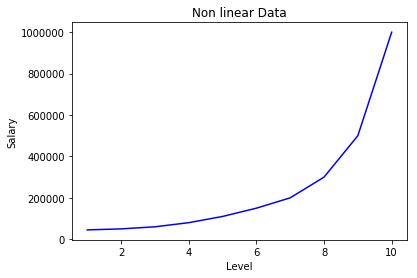

In [66]:
# Visualising the Non linear data
plt.plot(X, y, color = 'blue')
plt.title('Non linear Data')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [67]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(n_jobs=-1)
lin_reg.fit(X,y)
rf_reg = RandomForestRegressor(n_estimators = 15, random_state = 0)
rf_reg.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=15,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [68]:
# Predicting a new result
y_pred = rf_reg.predict(X)
y_pred

array([ 47000.        ,  49333.33333333,  59666.66666667,  79333.33333333,
       105333.33333333, 144000.        , 203333.33333333, 296666.66666667,
       453333.33333333, 820000.        ])

In [71]:
print("RF prediction",rf_reg.predict([[6.5]]))

RF prediction [164666.66666667]


In [72]:
print("LR prediction",lin_reg.predict([[6.5]]))

LR prediction [330378.78787879]


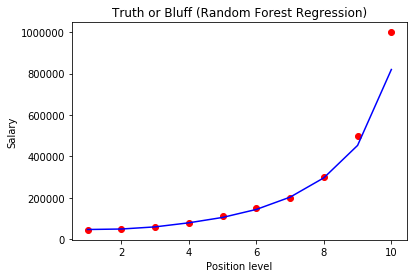

In [73]:
# Visualising the Random Forest Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X,y_pred, color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

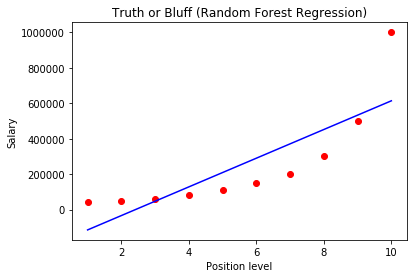

In [74]:
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X,lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Feature Selection

In [114]:
df = pd.read_csv("Electicity_Consumption_train.csv", index_col=0)

In [115]:
df.head()

,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
ID,,,,,,,
0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0
1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0
2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0
3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0
4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0


In [116]:
df.shape

(26496, 7)

In [117]:
df.var2.value_counts()

A    25239
C     1040
B      217
Name: var2, dtype: int64

In [118]:
def time_vars_with_day(df, var):
    df[var +'_Year'] = pd.DatetimeIndex(df[var]).year
        
    df[var +'_Month'] = pd.DatetimeIndex(df[var]).month
    
    df[var +'_Day'] = pd.DatetimeIndex(df[var]).weekday
    
    df[var +'_Hour'] = pd.DatetimeIndex(df[var]).hour

In [119]:
time_vars_with_day(df,'datetime')

In [120]:
df.columns

Index(['datetime', 'temperature', 'var1', 'pressure', 'windspeed', 'var2',
       'electricity_consumption', 'datetime_Year', 'datetime_Month',
       'datetime_Day', 'datetime_Hour'],
      dtype='object')

In [121]:
df = df.drop(columns=['datetime'], axis=1)

In [122]:
df['var2'] = df['var2'].map(df['var2'].value_counts().to_dict())

In [123]:
year_ord = {}
idx = 1
for year in df['datetime_Year'].sort_values().unique():
    year_ord[year] = idx
    idx = idx + 1

In [124]:
df['datetime_Year'] = df['datetime_Year'].map(year_ord)

In [125]:
df.head()

,temperature,var1,pressure,windspeed,var2,electricity_consumption,datetime_Year,datetime_Month,datetime_Day,datetime_Hour
ID,,,,,,,,,,
0,-11.4,-17.1,1003.0,571.910,25239,216.0,1,7,0,0
1,-12.1,-19.3,996.0,575.040,25239,210.0,1,7,0,1
2,-12.9,-20.0,1000.0,578.435,25239,225.0,1,7,0,2
3,-11.4,-17.1,995.0,582.580,25239,216.0,1,7,0,3
4,-11.4,-19.3,1005.0,586.600,25239,222.0,1,7,0,4


In [127]:
X = df.drop(columns = ['electricity_consumption']).values
y = df['electricity_consumption'].values

cols = df.drop(columns = ['electricity_consumption']).columns

In [128]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.4, 
                                                    random_state = 100)

In [129]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
meanX = sc_X.mean_
varX = sc_X.var_

X_test = sc_X.transform(X_test)

In [133]:
# Fitting Multi Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
lin_regressor = LinearRegression(n_jobs=-1)
lin_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [134]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 15, random_state = 0)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=15,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [135]:
from sklearn.metrics import mean_squared_error
print('RMSE for Multi Linear Regression with Selected Features: ',
      mean_squared_error(y_test,lin_regressor.predict(X_test))**0.5)
print('RMSE for Random Forest Regression with Selected Features: ',
      mean_squared_error(y_test,rf_regressor.predict(X_test))**0.5)

RMSE for Multi Linear Regression with Selected Features:  95.6474166641024
RMSE for Random Forest Regression with Selected Features:  73.7022984132477


### Feature Importances

In [136]:
rf_regressor.feature_importances_

array([0.16780916, 0.22848438, 0.08385952, 0.1495789 , 0.00465953,
       0.0594428 , 0.14559593, 0.07833212, 0.08223765])

In [140]:
feat_imps = pd.concat([pd.DataFrame(cols, columns=['Features']),
                       pd.DataFrame(rf_regressor.feature_importances_, 
                                    columns=['Importances'])],
                     axis=1)
feat_imps

,Features,Importances
0,temperature,0.167809
1,var1,0.228484
2,pressure,0.083860
3,windspeed,0.149579
4,var2,0.004660
5,datetime_Year,0.059443
6,datetime_Month,0.145596
7,datetime_Day,0.078332
8,datetime_Hour,0.082238


In [141]:
feat_imps = feat_imps.sort_values(['Importances'], ascending=False)
feat_imps

,Features,Importances
1,var1,0.228484
0,temperature,0.167809
3,windspeed,0.149579
6,datetime_Month,0.145596
2,pressure,0.083860
8,datetime_Hour,0.082238
7,datetime_Day,0.078332
5,datetime_Year,0.059443
4,var2,0.004660


In [142]:
feat_imps['Cumulative Importances'] = feat_imps['Importances'].cumsum()
feat_imps

,Features,Importances,Cumulative Importances
1,var1,0.228484,0.228484
0,temperature,0.167809,0.396294
3,windspeed,0.149579,0.545872
6,datetime_Month,0.145596,0.691468
2,pressure,0.083860,0.775328
8,datetime_Hour,0.082238,0.857566
7,datetime_Day,0.078332,0.935898
5,datetime_Year,0.059443,0.995340
4,var2,0.004660,1.000000


In [143]:
feat_imps = feat_imps[feat_imps['Cumulative Importances'] < 0.95]
feat_imps

,Features,Importances,Cumulative Importances
1,var1,0.228484,0.228484
0,temperature,0.167809,0.396294
3,windspeed,0.149579,0.545872
6,datetime_Month,0.145596,0.691468
2,pressure,0.083860,0.775328
8,datetime_Hour,0.082238,0.857566
7,datetime_Day,0.078332,0.935898


In [96]:
feat_imps['Features'].tolist()

['var1',
 'temperature',
 'windspeed',
 'datetime_Month',
 'pressure',
 'datetime_Hour',
 'datetime_Day']

### Creating a function for Feature Selection

In [144]:
def feature_select(X, y, cols, cutoff):
    regressor = RandomForestRegressor(n_estimators = 15, random_state = 0)
    regressor.fit(X, y)
    feat_imps = pd.concat([pd.DataFrame(cols, columns=['Features']),
                       pd.DataFrame(regressor.feature_importances_, columns=['Importances'])],
                     axis=1)
    feat_imps = feat_imps.sort_values(['Importances'], ascending=False)
    feat_imps['Cumulative Importances'] = feat_imps['Importances'].cumsum()
    feat_imps = feat_imps[feat_imps['Cumulative Importances'] < cutoff]
    return feat_imps['Features'].tolist()    

In [145]:
imp_cols = feature_select(X, y, cols, 0.95)
imp_cols

['var1',
 'temperature',
 'datetime_Month',
 'windspeed',
 'datetime_Hour',
 'datetime_Day',
 'pressure']

## Using Selected Features only for Model training

In [146]:
X = df[imp_cols].values
X.shape

(26496, 7)

In [147]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.4, 
                                                    random_state = 100)

In [148]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
meanX = sc_X.mean_
varX = sc_X.var_

X_test = sc_X.transform(X_test)

In [149]:
# Fitting Multi Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
lin_regressor = LinearRegression(n_jobs=-1)
lin_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [150]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 15, random_state = 0)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=15,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [151]:
from sklearn.metrics import mean_squared_error
print('RMSE for Multi Linear Regression with Selected Features: ',
      mean_squared_error(y_test,lin_regressor.predict(X_test))**0.5)
print('RMSE for Random Forest Regression with Selected Features: ',
      mean_squared_error(y_test,rf_regressor.predict(X_test))**0.5)

RMSE for Multi Linear Regression with Selected Features:  95.91716046805705
RMSE for Random Forest Regression with Selected Features:  77.8946489408379


## Hyper Parameter Tuning

** Find best parameters for lowest RMSE **

** Support Vector Machines **

** Random Forest **

** Decision Tree **

** Adaboost **

In [152]:
from sklearn.metrics import make_scorer, mean_squared_error, mean_squared_log_error

In [153]:
# Define scorer
def rmsle(y_test, y_pred):
    msle = mean_squared_log_error(y_test, y_pred)
    return 100*(msle**0.5)

In [154]:
# Define scorer
def rmse(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    return mse**0.5

In [64]:
rmse_scorer = make_scorer(rmse,greater_is_better=False)

In [ ]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = {"n_estimators": [100, 200, 300],
              "criterion":['gini','entropy'],
              "max_depth": [8, 16, 32],
              "min_samples_split": [10, 20, 30],
              "min_samples_leaf": [1, 5, 15],
              "min_weight_fraction_leaf": [0.1, 0.05, 0.005]}
grid_search = GridSearchCV(estimator = rf,
                           param_grid = parameters,
                           scoring = rmse_scorer,
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)